In [1]:
%matplotlib notebook
%matplotlib inline

In [88]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
# Create file paths for csv files
mouse = 'data\Mouse_metadata.csv'
study = 'data\Study_results.csv'

# Read in files from csv
mouse_df = pd.read_csv(mouse)
study_df = pd.read_csv(study)

print(mouse_df.head())
print(study_df.head())

# Merge both data sets on Mouse ID
ms_df = pd.merge(mouse_df, study_df, on='Mouse ID', how='inner')
ms_df.head()

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Looking for number of Mice
num_mice = study_df['Mouse ID'].nunique()
num_mice # 249 Mice

# Getting duplicate rows that occur between Mouse ID and Timepoint
dups = study_df[study_df.duplicated(['Mouse ID', 'Timepoint'])] 
# Mouse ID g989 is duplicated in the Timepoint

In [5]:
# Creating a df to store the duplicate Mouse data
dup_mouse_df = ms_df[ms_df['Mouse ID']=='g989']

In [6]:
# Cleaning the merged df from Mouse ID g989
cln_df = ms_df[ms_df['Mouse ID']!='g989']
cln_df

new_num_mice = cln_df['Mouse ID'].nunique()
new_num_mice # 248 Mice

248

In [7]:
# Finding summary statistics for the mouse study
sum_stat = cln_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
sum_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

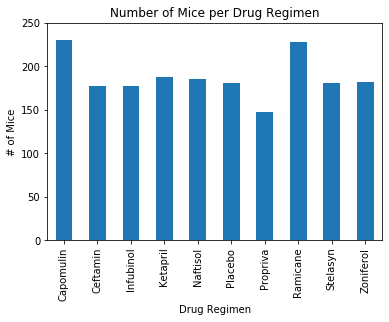

In [8]:
# Generating a bar plot of number of mice for each Regimen in pandas
mice = cln_df.groupby('Drug Regimen')['Mouse ID'].count()

mice.plot(kind='bar', title='Number of Mice per Drug Regimen')
plt.ylabel('# of Mice')
plt.ylim(0, 250)
plt.show()

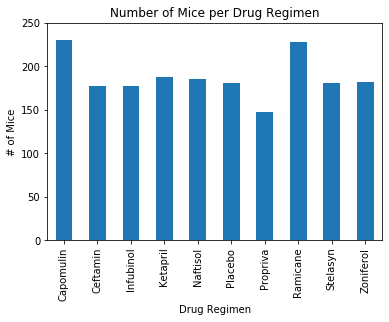

In [9]:
# Generating a bar plot of number of mice for each Regimen in pyplot
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, align='center', width=0.5)
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
ticks=[value for value in x_axis]
plt.xticks(ticks, mice.index.array, rotation=90)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, 250)
plt.show()

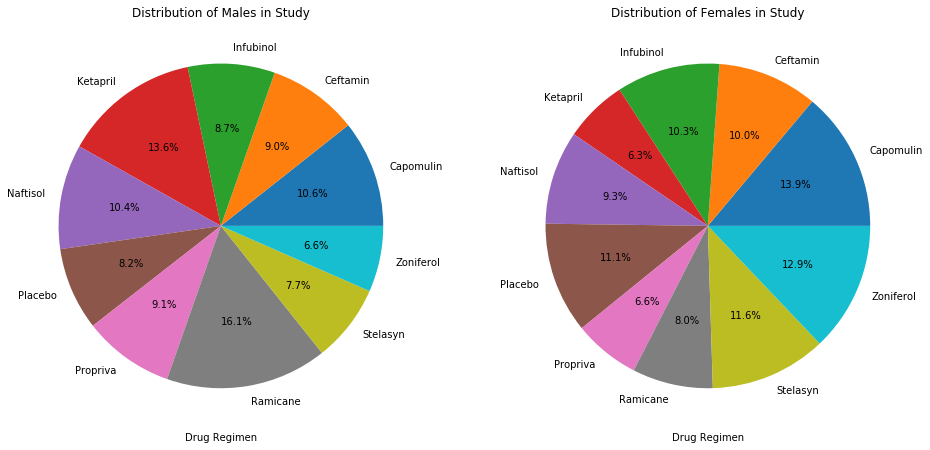

In [10]:
# Generating a pie plot to show distribustion mice for each gender in pandas
male = cln_df[cln_df['Sex']=='Male'].groupby('Drug Regimen').count()
# male = cln_df.groupby('Drug Regimen')['Sex'].count()
male = male.drop(male.columns[1:7], axis=1)
male

female = cln_df[cln_df['Sex']=='Female'].groupby('Drug Regimen').count()
# male = cln_df.groupby('Drug Regimen')['Sex'].count()
female = female.drop(female.columns[1:7], axis=1)
female

plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
male.plot(kind='pie',y='Mouse ID', ax=ax1,title='Distribution of Males in Study', autopct='%1.1f%%', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('')

ax2 = plt.subplot(122)
female.plot(kind='pie',y='Mouse ID', ax=ax2,title='Distribution of Females in Study', autopct='%1.1f%%', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('')
plt.show()

C:\Users\dmbor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
C:\Users\dmbor\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


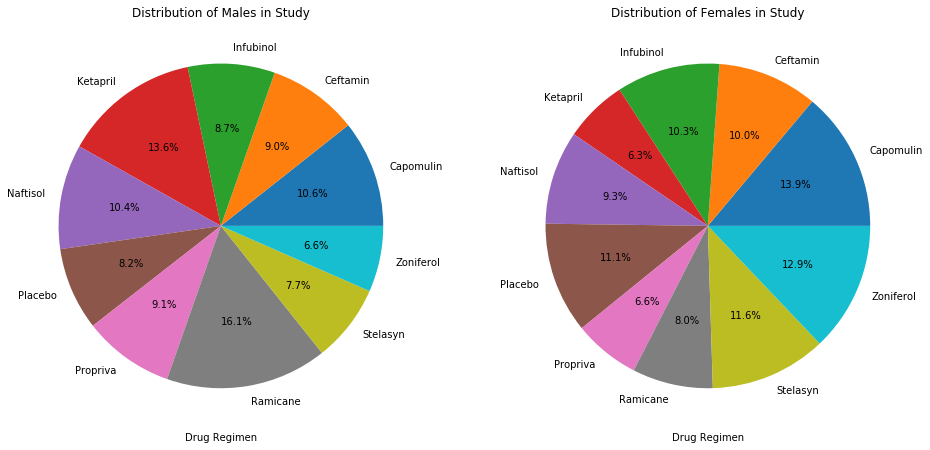

In [11]:
# Generating a pie plot to show distribustion mice for each gender in pyplot
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
plt.pie(male, labels=male.index.array, autopct='%1.1f%%')
ax1.set_title('Distribution of Males in Study')
plt.xlabel('Drug Regimen')

ax2 = plt.subplot(122)
plt.pie(female, labels=female.index.array, autopct='%1.1f%%')
ax2.set_title('Distribution of Females in Study')
plt.xlabel('Drug Regimen')
plt.show()

In [12]:
# most promising treatments
top_drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [13]:
# Calculate the final tumor volume for each mouse accross the 4 most promising treatments
ms_tmr = cln_df.groupby('Mouse ID')['Timepoint'].last()
ms_tmr_sz=pd.merge(ms_tmr, cln_df, on='Timepoint', how='left')
ms_tmr_sz

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
39991,45,y769,Ceftamin,Female,6,27,68.594745,4
39992,45,y865,Ceftamin,Male,23,26,64.729837,3
39993,45,z581,Infubinol,Female,24,25,62.754451,3
39994,45,z795,Naftisol,Female,13,29,65.741070,3


In [65]:
tp_four = ms_tmr_sz[ms_tmr_sz['Drug Regimen'].isin(top_drug)]
tp_four = tp_four.loc[:,['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)']].sort_values('Drug Regimen')
tp_four = tp_four.pivot(columns='Drug Regimen', values='Tumor Volume (mm3)')
tp_four

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
0,NaN,NaN,NaN,22.050126
1,23.343598,NaN,NaN,NaN
2,28.484033,NaN,NaN,NaN
3,28.430964,NaN,NaN,NaN
4,NaN,NaN,NaN,29.128472
...,...,...,...,...
39987,NaN,61.386660,NaN,NaN
39988,NaN,NaN,67.685569,NaN
39991,NaN,68.594745,NaN,NaN
39992,NaN,64.729837,NaN,NaN


In [75]:
quartiles = tp_four['Capomulin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

quartiles = tp_four['Ramicane'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

quartiles = tp_four['Infubinol'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

quartiles = tp_four['Ceftamin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

The lower quartile of Capomulin is: 35.46375763
The upper quartile of Capomulin is: 43.23038986
The interquartile range of Capomulin is: 7.766632229999999
The the median of Capomulin is: 38.98287774 
Values below 23.813809285000005 could be outliers.
Values above 54.880338205 could be outliers.

The lower quartile of Ramicane is: 33.56240217
The upper quartile of Ramicane is: 43.04754260000001
The interquartile range of Ramicane is: 9.485140430000008
The the median of Ramicane is: 38.25972497 
Values below 19.334691524999986 could be outliers.
Values above 57.275253245000016 could be outliers.

The lower quartile of Infubinol is: 49.27309187
The upper quartile of Infubinol is: 64.13872489
The interquartile range of Infubinol is: 14.865633020000004
The the median of Infubinol is: 56.52332726 
Values below 26.974642339999995 could be outliers.
Values above 86.43717442000002 could be outliers.

The lower quartile of Ceftamin is: 49.40687901
The upper quartile of Ceftamin is: 63.46954946
T

Text(0.5, 0, 'Drug Regimen')

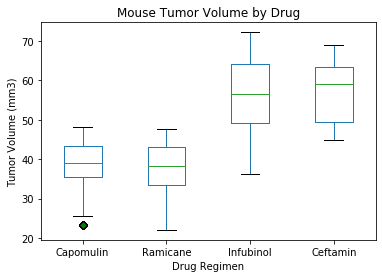

In [94]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax1 = plt.subplots()
tp_four.boxplot(column=top_drug, grid=False, flierprops=green_diamond)
ax1.set_title('Mouse Tumor Volume by Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')